# Quickstart

This quick introductory example demonstrates how to use `gwrefpy` to analyze an observation and a reference well, calibrate the two wells, and visualize the results.


In [1]:
import gwrefpy as gr
import pandas as pd
import numpy as np

For this quickstart example, we will generate two fictious timeseries. 

In [2]:
dates = pd.date_range(start="2020-01-01", periods=365, freq="D")

obs_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365)) + (np.random.normal(0, 0.1, 365) * 2), index=dates)
ref_series = pd.Series(np.sin(np.linspace(0, 4 * np.pi, 365)) + np.random.normal(0, 0.1, 365), index=dates)

To use the timeseries in `gwrefpy`, we create `Well` objects.

In [3]:

obs = gr.Well(name="obs", is_reference=False, timeseries=obs_series)
ref = gr.Well(name="ref", is_reference=True, timeseries=ref_series)

Let's create our `Model` object which will hold wells and associated fits. We then add both wells and use `model.plot_wells()` which will plot all available wells.

Plotting well: obs
Plotting well: ref


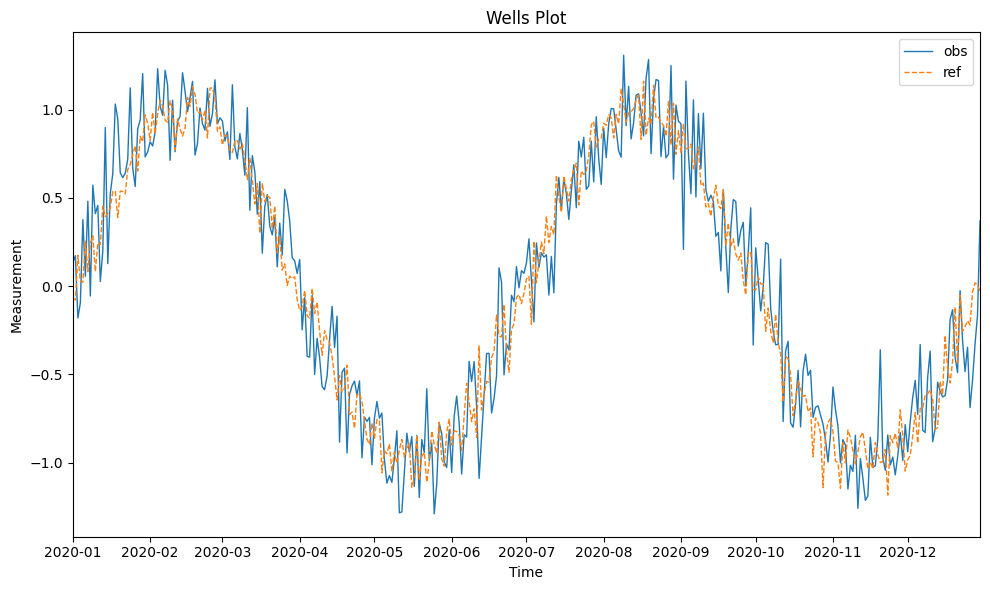

In [4]:
model = gr.Model(name="my first model")
model.add_well(obs)
model.add_well(ref)

fig, ax = model.plot_wells()
ax.legend()

Let's fit the obervation well to our reference well. Since we know the series share the same timestamps, we can safely use `"0D"` as an offset (i.e., no offset). 

> See the _Regarding time offsets_ notebook for more details on offsets.

In [5]:
model.fit(
    obs,
    ref,
    offset="0D"
)

Fitting model 'my first model' using reference well 'ref' and observation well 'obs'.


Statistic,Value,Description
RMSE,0.9511,Root Mean Square Error
R²,0.9046,Coefficient of Determination
R-value,0.9511,Correlation Coefficient
Slope,0.9822,Linear Regression Slope
Intercept,0.0113,Linear Regression Intercept
P-value,0.0000,Statistical Significance
N,365,Number of Data Points
Std Error,0.2270,Standard Error
Confidence,95.0%,Confidence Level


Let's plot the fit. We can use `model.plot_fits()` since we only have one fit. By default, any levels from the observation well falling outside the fitted confidence interval will be highlighted with a red circle.

Plotting fit: obs ~ ref


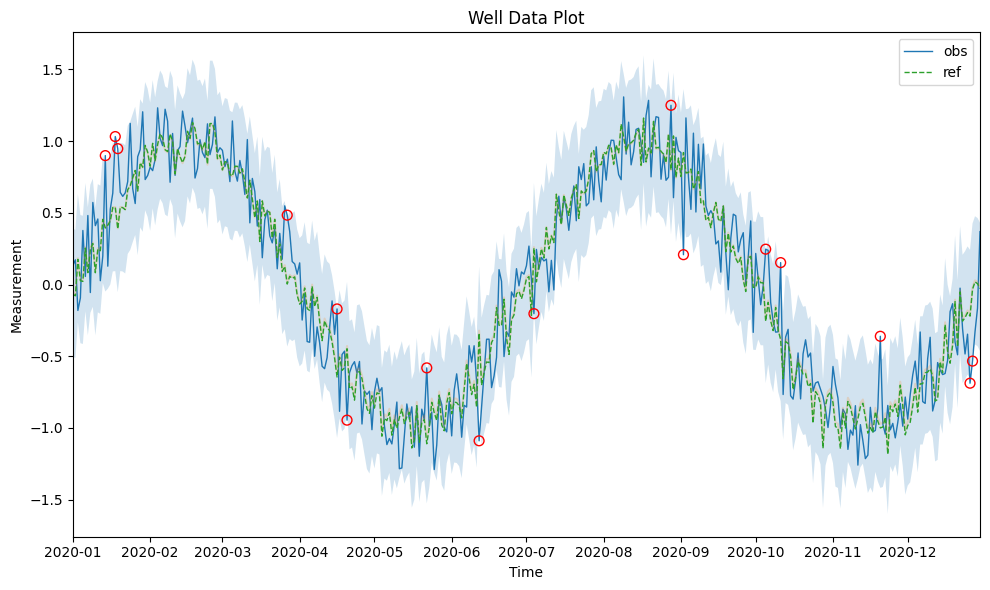

In [6]:
fig, ax = model.plot_fits()
ax.legend()